## COMP6713  - Natural Language Processing – 25T1

### Tutorial – Week 3

1. Using the genism library, compare the time taken to train Word2Vec embeddings for the following scenarios.
   1. For the skip-gram architecture, Hierarchical softmax versus Negative sampling with 10 samples
   2. For the skip-gram architecture, Negative sampling with 50 samples versus 10 samples
   3. Four possible combinations for {skip-gram, CBOW} X {Hierarchical softmax, Negative sampling with 10 samples}.

    Plot line graphs that show the training time versus training corpus size.
    You may use the Brown corpus or its subset in NLTK.
    Refer to the documentation available here: https://radimrehurek.com/gensim/models/word2vec.html


2. Implement a probabilistic language model as follows:
   1. Your language model will make the bi-gram assumption.
   2. Incorporate add-one smoothing. 
   3. Show how the language model can be used to complete sentences of a fixed length. 

In [ ]:
from nltk.corpus import brown
import gensim
import os

In [4]:
import time
start_time = time.time()
print("HRTR")
print("--- %s seconds ---" % (time.time() - start_time))

HRTR
--- 0.0001747608184814453 seconds ---


In [14]:
hs_time = []
ns_time = []

for i in range(1000, 10000, 1000):
    train_set = brown.sents()[:i]
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 1, hs = 1)
    hs_time.append(time.time() - start_time)
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 1, hs = 0, negative = 10)
    ns_time.append(time.time() - start_time)

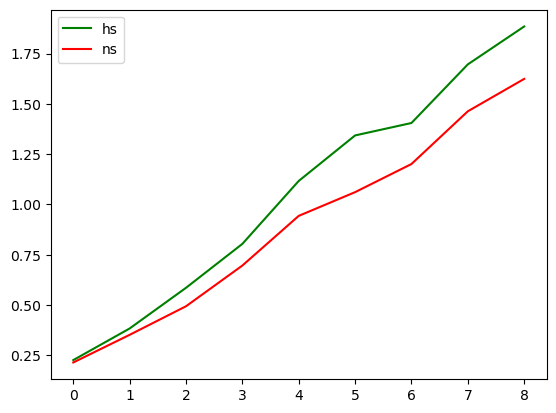

In [18]:
import matplotlib.pyplot as plt
plt.plot(hs_time, 'g', label="hs")
plt.plot(ns_time, 'r', label = "ns")
plt.legend(loc="upper left")
plt.show()

In [19]:
ns50_time = []
ns10_time = []

for i in range(1000, 10000, 1000):
    train_set = brown.sents()[:i]
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, hs = 0, negative = 50)
    ns50_time.append(time.time() - start_time)
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 1, hs = 0, negative = 10)
    ns10_time.append(time.time() - start_time)

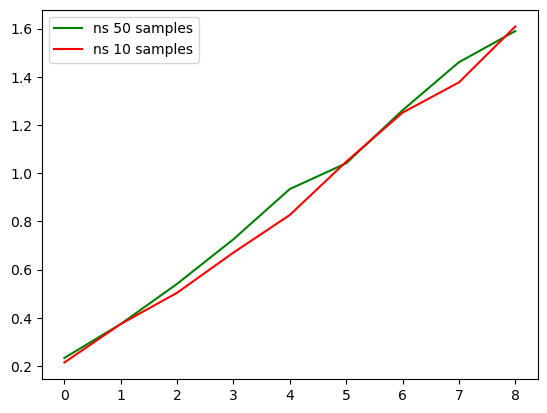

In [21]:
import matplotlib.pyplot as plt
plt.plot(ns50_time, 'g', label="ns 50 samples")
plt.plot(ns10_time, 'r', label = "ns 10 samples")
plt.legend(loc="upper left")
plt.show()

In [23]:
cbow_hs_time = []
sg_hs_time = []
cbow_ns_time = []
sg_ns_time = []

for i in range(1000, 10000, 1000):
    train_set = brown.sents()[:i]
    
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 1, hs = 1)
    sg_hs_time.append(time.time() - start_time)
    
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 0, hs = 1)
    cbow_hs_time.append(time.time() - start_time)
    
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 0, hs = 0, negative = 10)
    cbow_ns_time.append(time.time() - start_time)
    
    start_time = time.time()
    model = gensim.models.Word2Vec(train_set, sg = 1, hs = 0, negative = 10)
    sg_ns_time.append(time.time() - start_time)


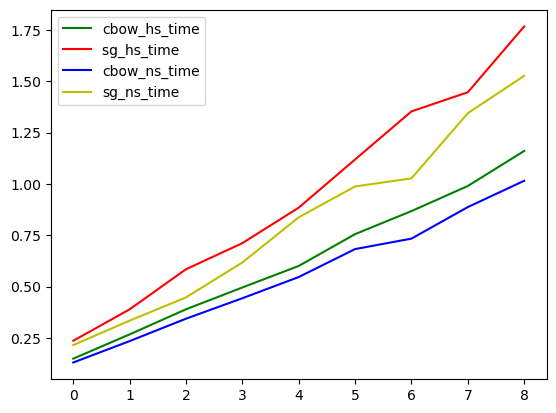

In [25]:
import matplotlib.pyplot as plt
plt.plot(cbow_hs_time, 'g', label="cbow_hs_time")
plt.plot(sg_hs_time , 'r', label = "sg_hs_time ")
plt.plot(cbow_ns_time, 'b', label="cbow_ns_time")
plt.plot(sg_ns_time , 'y', label = "sg_ns_time")

plt.legend(loc="upper left")
plt.show()